1 Analisar as distribuições das variáveis para ver se estão enviesadas e precisam de correção; tratamento de valores ausentes, variáveis categóricas e normalização, quando for o caso.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'retina' # set 'png' here when working on notebook
%matplotlib inline

Carregando os dados

In [12]:
train = pd.read_csv("data/eleicoes_2006_TREINO_CONFIGURADO_LIBRE.csv")
test = pd.read_csv("data/eleicoes_2010_TESTE_CONFIGURADO_LIBRE.csv")
all_data = pd.concat((train.loc[:,'ano':'votos'], test.loc[:,'ano':'votos']))

In [13]:
train.head()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.0,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.0,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
3,2006,10002,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,...,8,8,3001.12,375.140000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
4,2006,10003,ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,...,133,120,116416.64,970.138667,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401


In [14]:
test.head()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2010,10000000194,ANTONIA LUCILEIA CRUZ RAMOS CAMARA,AC,PSC,36,35,406891.92,11625.483429,269179.61,...,54,48,381881.55,7955.865625,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,CASADO(A),EMPRESÁRIO,15849
1,2010,10000000195,DEODATO NUNES DE FRANÇA,AC,PMDB,3,3,6990.00,2330.000000,NaN,...,3,3,6990.00,2330.000000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),OUTROS,4620
2,2010,10000000196,EDSON FIRMINO DE PAULA,AC,PSDB,3,3,1840.00,613.333333,290.00,...,3,3,1840.00,613.333333,DEPUTADO FEDERAL,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),"OPERADOR DE EQUIPAMENTO DE RÁDIO, TELEVISÃO, S...",312
3,2010,10000000197,ELISABETH APARECIDA GARCIA RODRIGUES,AC,PSDB,1,1,440.00,440.000000,440.00,...,1,1,440.00,440.000000,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,CASADO(A),PROFESSOR DE ENSINO MÉDIO,1357
4,2010,10000000198,FLAVIANO FLAVIO BAPTISTA DE MELO,AC,PMDB,15,13,241500.00,18576.923077,NaN,...,83,59,232677.64,3943.688814,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),DEPUTADO,36301


In [15]:
all_data.head()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.0,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.0,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
3,2006,10002,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,...,8,8,3001.12,375.140000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
4,2006,10003,ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,...,133,120,116416.64,970.138667,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401


Analisar as distribuições das variáveis para ver se estão enviesadas e precisam de correção; tratamento de valores ausentes, variáveis categóricas e normalização, quando for o caso.

Normalização: First I'll transform the skewed numeric features by taking log(feature + 1) - this will make the features more normal

In [16]:
#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) # compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

Tratamento de valores ausentes: Create Dummy variables for the categorical features Replace the numeric missing values (NaN's) with the mean of their respective columns

In [17]:
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

Construir modelos de regressão com (ridge e lasso) e sem regularização.

Models Now we are going to use regularized linear regression models from scikit learn module. I'm going to try both l_1 (lasso) and l_2 (Ridge) regularization. I'll also define a function that returns the cross-validation rmse error we can evaluate our models and pick the best tuning par.

In [21]:
# creating matrices for sklearn
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.votos

In [22]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring = "neg_mean_squared_error", cv = 5 ))
    return (rmse)

model_rodge = Ridge()

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexibe our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

In [25]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 80, 90]
cv_ridge = [rmse_cv (Ridge (alpha = alpha)).mean() for alpha in alphas]

The main tuning parameter for the Ridge model is alpha - a regularization parameter that measures how flexibe our model is. The higher the regularization the less prone our model will be to overfit. However it will also lose flexibility and might not capture all of the signal in the data.

Text(0, 0.5, 'rmse')

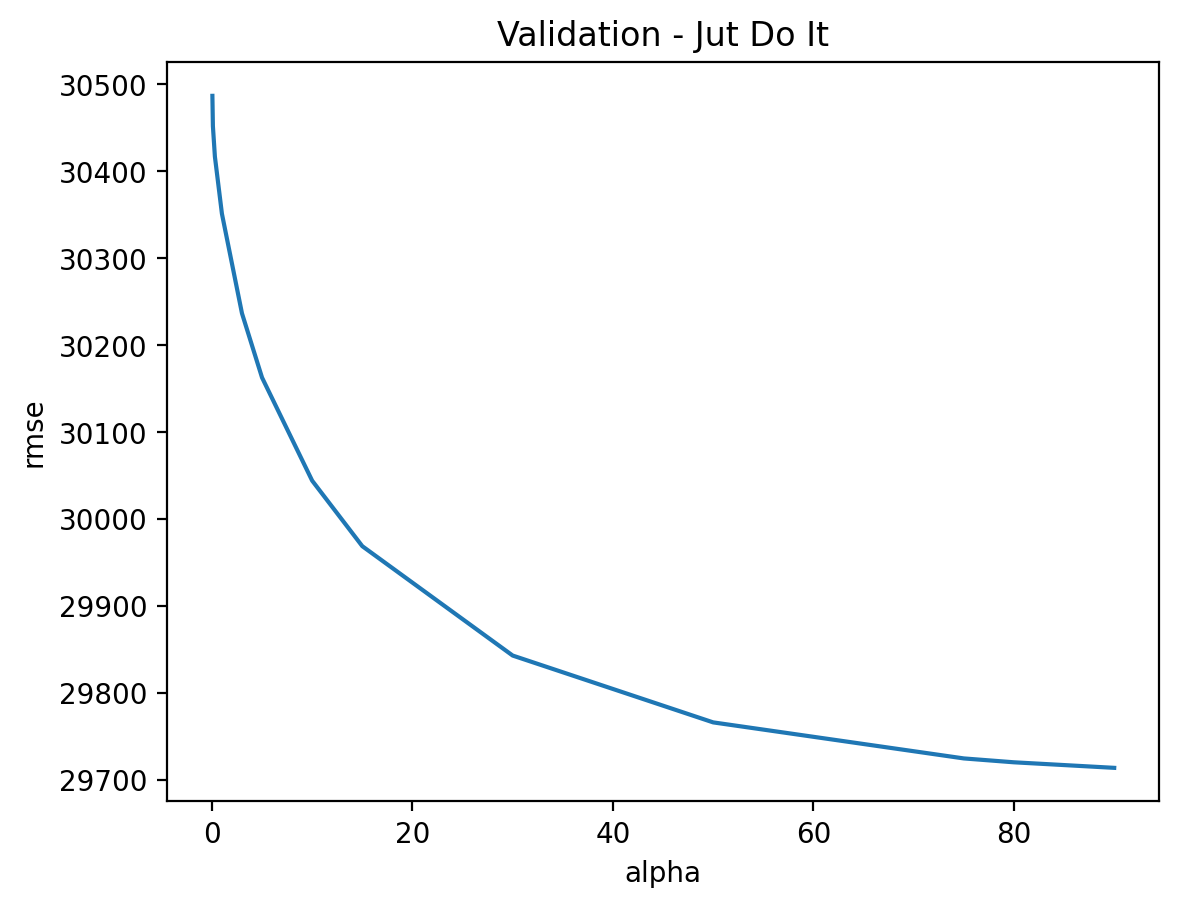

In [26]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Jut Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")